# Short-term synaptic depression
## The full kinetic model

Let's first consider and derive the Tsodyks-Markram model of short-term synaptic depression.

We consider the efficacy of synaptic connections as described and linked to the absolute amount of *resources* for neurotransmission. Without concerns on the inherent meaning and presynaptic or postsynaptic interpretation of such resources, they can partitioned into three distinct states at each moment in time: effective ($E$), inactive ($I$), and recovered/ready ($R$).

The kinetic relationship between these three states can be visualized by a three-state Markov scheme.

$R ~~ \rightarrow ~~ E$

$\nwarrow ~~ \swarrow$

$I$

Let's associate to each transistion a kinetic rate, which can be equivalently expressed also as the inverse of a time constant:

- the (activation) transition from $R$ to $E$ is associated with the rate $\alpha$
- the (inactivation) transition from $E$ to $I$ is associated with the rate $(\tau_i)^{-1}$
- the (recovery) transition from $I$ to $R$ is associated with the rate $(\tau_D)^{-1}$

A set of three ordinary differential equations can be now written, which is equivalent to the kinetic scheme above:

$\frac{dR}{dt} = \frac{I}{\tau_D} - \alpha R$

$\frac{dE}{dt} = \alpha R - \frac{E}{\tau_i}$

$\frac{dI}{dt} = \frac{E}{\tau_i} - \frac{I}{\tau_D}$

We note that upon summing the above three equation, one obtains a relationship indicating that only two of the three equations are independent.

$\frac{d(R + E + I)}{dt} = 0$

implying

$R + E + I = constant$

We can always set such a constant to $1$, upon appropriate normalization of the individual state variables $R$, $E$, and $I$, and express one of the variable as a function of the other two.

## Simplifying, realistic assumptions

We assume that

- the activation occurs extremely rapidly, and it is associated to a precise time like the time of of arrival of individual action potentials (e.g. vescicles exocytosis, upon a presynaptic AP, is extremely fast and temporally concentrated);
- the inactivation processes are fast and
- the recovery processes are instead much slower than the inactivation ones.

### Numerical simulation of the model

Let's simulate this model numerically and plot the results of the simulation, for a conventional choices of the numerical parameters that respects our assumptions above.

In [5]:
# @title Tsodyks-Markram description of short-term synaptic plasticity

import numpy as np
import matplotlib.pyplot as plt

Δt = 0.1        # time discretization step, ms
T  = 300.        # lifetime of the simulation, ms
N  = np.ceil(T/Δt) # corresponding number of steps
t = np.linspace(0, T, int(T/Δt))  # Array containg the "time" axis [ms]
N    = len(t)                     # Length of "time", i.e. how many discrete time steps

R  = np.zeros(N)  # allocated as an array filled of zeros
E  = np.zeros(N)  # allocated as an array filled of zeros
I  = np.zeros(N)  # allocated as an array filled of zeros
α  = np.zeros(N)  # allocated as an array filled of zeros

R[0] = 1.        # Initial condition: all resources are as "R"
E[0] = 0.        # Initial condition: all resources are as "R", none as "E"
I[0] = 0.        # Initial condition: all resources are as "R", none as "I"

τi   = 0.2       # Inactivation time constant, ms
τD   = 300.      # Recovery time constant, ms

#for k=299:300
α[300] = 2   # Activation rate, ms^-1: very fast and concentrated in time
α[400] = 2   # Activation rate, ms^-1: very fast and concentrated in time
α[500] = 2   # Activation rate, ms^-1: very fast and concentrated in time
α[600] = 2   # Activation rate, ms^-1: very fast and concentrated in time
α[2300] = 2   # Activation rate, ms^-1: very fast and concentrated in time
#end

# Actual numerical solution of the three equations, by Euler forward method -----------------------
for k in range(1,N):
  R[k] = R[k-1] + Δt * ( I[k-1] / τD     - α[k-1] * R[k-1] )
  E[k] = E[k-1] + Δt * ( α[k-1] * R[k-1] - E[k-1] / τi )
  I[k] = I[k-1] + Δt * ( E[k-1] / τi     - I[k-1] / τD )

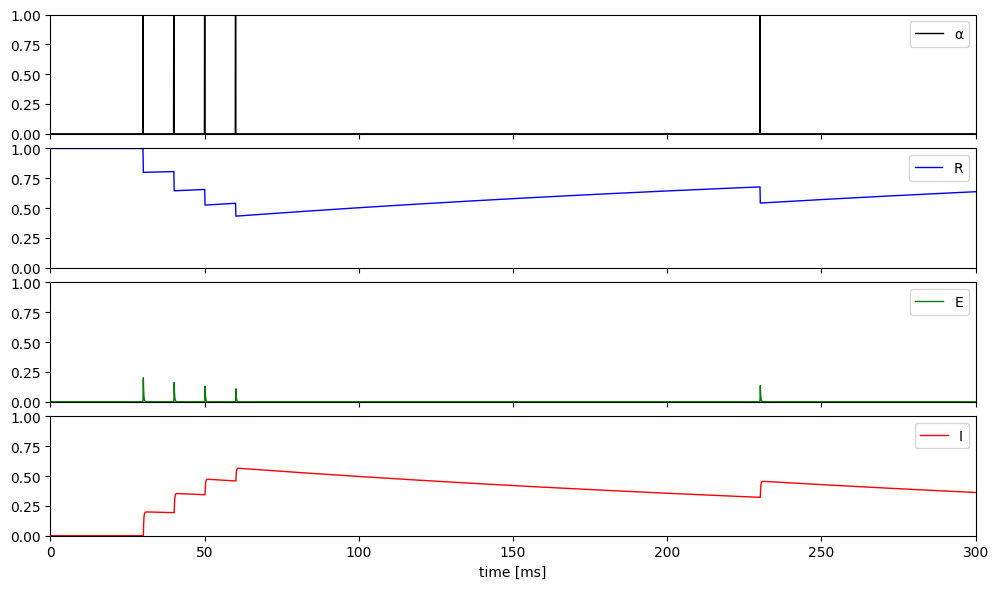

In [6]:
# @title Tsodyks-Markram: numerical solution of the full model

fig, axes = plt.subplots(nrows=4,ncols=1,figsize=(10,6))
axes[0].plot(t, α, color = 'black', linewidth = 1)
axes[0].legend(['α'])
axes[1].plot(t, R, color = 'blue', linewidth = 1)
axes[1].legend('R')
axes[2].plot(t, E, color = 'green', linewidth = 1)
axes[2].legend('E')
axes[3].plot(t, I, color = 'red', linewidth = 1)
axes[3].legend('I')
plt.xlabel("time [ms]")
plt.xlim(0, T)
plt.ylim(0, 1)

for axes in axes.flat[:-1]:  # Flatten the axes array if it's multi-dimensional
    axes.set_xlim(0, T)
    axes.set_ylim(0, 1)
    axes.set_xticklabels([])

plt.tight_layout(w_pad=0.05, h_pad=0.05)

plt.show()


## Simplifying the model

If we refer as $t_{AP}$ to the time of arrival of an action potential, we can turn our first assumption into a very precise mathematical form,

$\alpha = U\ \delta(t - t_{AP})$

where $\delta(t)$ indicates a Dirac's Delta function and $U$ is a parameter reminiscent of the probability of activation (i.e. in a stochastic version of the same model). The third of our three previous assumption can be then also expressed in precise terms, stating that

$\tau_D >> \tau_i.$

Finally, since our the second of our three assumption mentioned the great rapidity of the inactivation process, we can simplify the second differential equation, which we can rewrite by multiplying both sides by $\tau_i$ as

$\tau_i \frac{dE}{dt} = \tau_i \alpha R - E$


As $\tau_i$ now appears as the characteristic time scale for the evolution in time of $E$, we consider the latter to be approximately equal to its steady-state.

$0 \approx \tau_i \alpha R - E$

and therefore

$E \approx \tau_i \alpha R$

From the simulation above, we see that the time course of $E$ is approximately described by a sudden increase followed by an exponential decay, (for $t>t_{AP}$), something like

$E(t) = E_{peak} e^{-(t-t_{AP})/\tau_i}$

It is easy to prove that an estimate of the peak amplitude can be obtained by $E_{peak} = \frac{1}{\tau_i} \int_{-\infty}^{+\infty}E(t)dt$. This is of course exact, assuming the exponential decay mentioned above. The actual peak amplitude can therefore be inferred from the same argument from the real expression for $E$:

$E_{peak}  = \frac{1}{\tau_i} \int_{-\infty}^{+\infty} \tau_i U\ \delta(t - t_{AP}) R(t) dt$

Therefore

$E_{peak}  = U\ R(t_{AP})$

Should we be only concerned with the peak values of the effective resources $E$ at the time of each activation event, we would simply use the formula above that requires only the knowledge of R at the time of each activation.

We approach now another simplification to the system of three differential equation. We first note that $I$ can be written in terms of $R$ and $E$

$I = 1 - R - E.$

Following the previous consideration, as $E$ is approximated with its steady-state value, $I$ can we approximated as

$I \approx 1 - R - \tau_i \alpha R = 1 - R (1 + \tau_i U\ \delta(t-t_{AP}))$

This can be then substituted into the first differential equation,

$\frac{dR}{dt} = \frac{I}{\tau_D} - \alpha R$

obtaining

$\frac{dR}{dt} \approx \frac{1 - R (1 + \tau_i U\ \delta(t-t_{AP}))}{\tau_D} - U\ \delta(t-t_{AP}) R$

and finally

$\frac{dR}{dt} \approx \frac{1 - R}{\tau_D} - U\ \delta(t-t_{AP})\ R\ (1 + \frac{\tau_i}{\tau_D})$

This last expression can be further simplified, remembering the third assumption on the diversity of recovery and inactivation time scales (i.e. $\tau_D >> \tau_i$) and thus neglecting the infinitesimal term represented by the ratio between $\tau_i$ and $\tau_D$.

$\frac{dR}{dt} \approx \frac{1 - R}{\tau_D} - U\ \delta(t-t_{AP})\ R$

### Numerical simulation of a reduced model

Let's now simulate this last, simplified, equation together with the approximate expression for $E \approx \tau_i U\ \delta(t-t_{AP}) R$. Qualitatively and quantitatively, the agreement with the previous simulations of the full model is satisfactory.


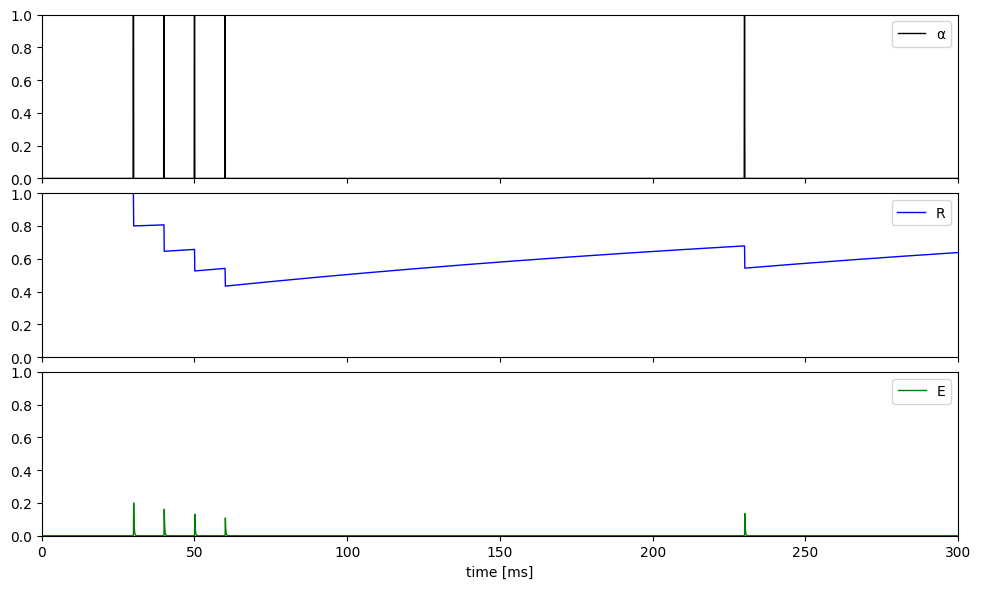

In [7]:
# @title Tsodyks-Markram: simplified model and its numerical simulation

# This is supposed to be launched *AFTER* the previous cell, containing the full simulation

# Initialization of the parameters and state variables ---------------------------------------------
RR  = np.zeros(N)  # allocated as an array filled of zeros
EE  = np.zeros(N)  # allocated as an array filled of zeros

RR[0] = 1.        # Initial condition: all resources are as "R"

# Actual numerical solution of the three equations, by Euler forward method -----------------------
for k in range(1,N):
  RR[k] = RR[k-1] + Δt * ( (1. - RR[k-1]) / τD - α[k-1] * RR[k-1] )
  EE[k] = τi * α[k] * RR[k]


fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(10,6))
axes[0].plot(t, α, color = 'black', linewidth = 1)
axes[0].legend(['α'])
axes[1].plot(t, RR, color = 'blue', linewidth = 1)
axes[1].legend('R')
axes[2].plot(t, E, color = 'green', linewidth = 1)
axes[2].legend('EE')
plt.xlabel("time [ms]")
plt.xlim(0, T)
plt.ylim(0, 1)

for axes in axes.flat[:-1]:  # Flatten the axes array if it's multi-dimensional
    axes.set_xlim(0, T)
    axes.set_ylim(0, 1)
    axes.set_xticklabels([])

plt.tight_layout(w_pad=0.05, h_pad=0.05)

plt.show()

## Iterative expression

We thus reduced the system of three differential equations to just one equation

$\frac{dR}{dt} \approx \frac{1 - R}{\tau_D} - U\ \delta(t-t_{AP})\ R$

and to an expression for the peak amplitude, corresponding to each activation event

$E_{peak}  = U\ R(t_{AP}).$

The knowledge of $R(t)$ at the time(s) of action potential is thus the only quantity required. When $t \neq t_{AP}$

$\frac{dR}{dt} \approx \frac{1 - R}{\tau_D}$

and a solution for this can be obtained analytically, leaving a constant $K$ unspecified, as

$R(t) = K e^{-t/\tau_D} + 1$

Instead, across the time of an action potential, we can integrate the original equation

$\int_{t_{AP}^-}^{t_{AP}^+} \frac{dR}{dt} \approx \int_{t_{AP}^-}^{t_{AP}^+} \frac{1 - R}{\tau_D}  - U\ \int_{t_{AP}^-}^{t_{AP}^+} \delta(t-t_{AP})\ R$

that can be rewritten by definition as

$\int_{t_{AP}^-}^{t_{AP}^+} \frac{dR}{R} \approx 0  - U\ \int_{t_{AP}^-}^{t_{AP}^+} \delta(t-t_{AP})\ dt$

$\ln \frac{R(t_{AP}^+)}{R(t_{AP}^-)} \approx - U$


$R(t_{AP}^+) \approx R(t_{AP}^-)\ e^{- U}$

When $U$ is small, we can write such an update rule further as

$R(t_{AP}^+) \approx R(t_{AP}^-)\ (1-U)$

Combining the last update rule and the analytical solution together makes it possible to derive a simple unified update rule. Given a sequence of activation times (i.e. $t_1, t_2, t_3, ..., t_k, t_{k+1}, ...$), we can write

$E(t_{k+1}) = \tau_i U R(t_{k+1}^-)$
$R(t_{k+1}^-) = 1 - [1 - (1-U)\ R(t_k^-)] e^{-\Delta_k/\tau_D}$

where $\Delta_k = t_{k+1} - t_k$ is the interval elapsed from the previous occurrence time.


### Numerical simulation

Let's now implement this last update rule numerically and test it.

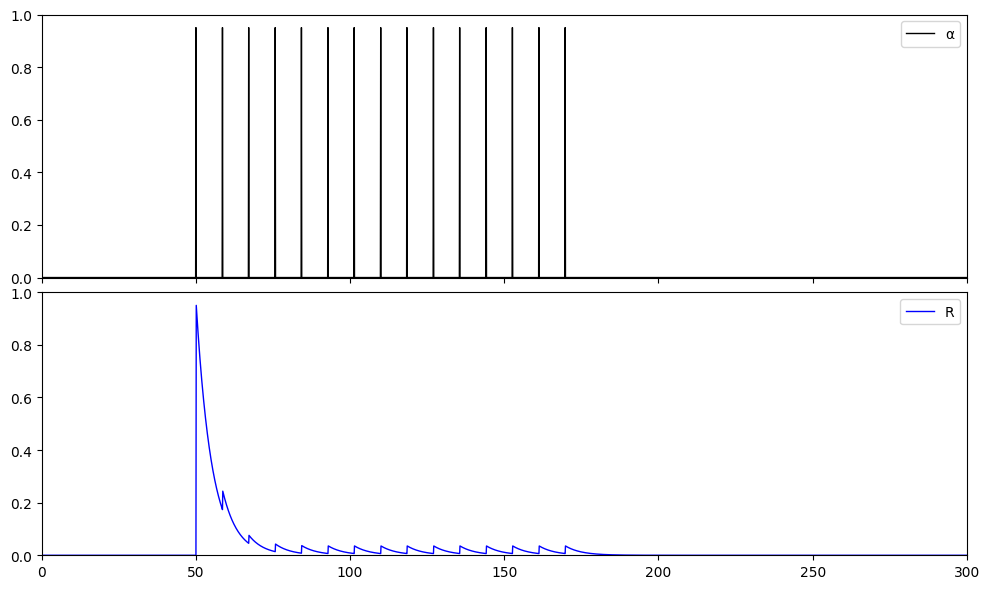

In [40]:
# @title After running this cell manually, it will auto-run if you change the selected value. { run: "auto" }

from scipy.signal import lfilter

f = 97.5 #@param {type:"slider", min:32.5, max:100, step:2.5}

τD2 = 290 #@param {type:"slider", min:0, max:500, step:10}

U = 0.9501 #@param {type:"slider", min:0.0001, max:1, step:0.05}


# Initialization of the parameters and state variables -----------------------------
r2  = 1.    # Initialization...
M  = 15     # Number of activation events
#f  = 25.    # (regular) frequency of the activation events, Hz
ISI= 1000. / f# inter-event interval, ms

A  = 1.     # Maximal synaptic efficacy
#U  = 0.8    # U parameter of short-term depressing synapses
τi2 = 5.     # Inactivation time constant, of individual EPSC, ms
#τD2 = 200.   # Recovery time constant from depression, ms
#τF2 = 500.   # Recovery time constant from facilitation, ms


delay  = 10 * τi2
events = np.linspace(delay, M*ISI + delay, int((M*ISI + delay)/ISI)) # by def, set of regular inter-spike intervals

u  = U     # Initialization..

out  = np.zeros(M)  # allocated as an array filled of zeros

out[0] = A * U;
events = np.sort(events);  # All events [s],  must be increasing in time..

# Actual numerical impelmentation of the iterative update rule --------------------------------------
for i in range(1,M):                            # Loop across events, starting from the 2nd...
  Δ = events[i] - events[i-1]               # definition of inter-spike interval
  r2 = (r2 * (1. - u) - 1.) * np.exp(-Δ/τD2) + 1. # STP (depression), iter expression..
#u =  u * (1. - U) * exp(-Δ/τF) + U;       # STP (facilitation), iterative expression..
  out[i] = A * r2 * u

# Let's turn this into a trace in time --------------------------------------------------------------

TT  = 500.
#TT  = maximum(events) + 10 * τi # lifetime of the simulation, ms
NN  = int(np.ceil(TT/Δt))               # corresponding number of steps
tt  = np.linspace(0, NN*Δt, NN)         # time axis, ms
#tt  = Δt:Δt:TT
#NN  = length(tt)

y  = np.zeros(NN)  # allocated as an array filled of zeros
x  = np.zeros(NN)  # allocated as an array filled of zeros
z = np.zeros(NN)  # allocated as an array filled of zeros

for k in range(M):
  i    = int(np.ceil(events[k]/Δt))
  z[i] = out[k]
  x[i] = U

AA    = [1., -np.exp(-Δt/τi2)]; # Refer to the documentation of "filt!()" - these are coefficients
BB    = [0., 1.];            # to efficiently compute a discrete-time iterative equation.
y = lfilter(BB, AA, z)



fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(10,6))
axes[0].plot(tt, x, color = 'black', linewidth = 1)
axes[0].legend(['α'])
axes[1].plot(tt, y, color = 'blue', linewidth = 1)
axes[1].legend('R')
plt.xlim(0, T)
plt.ylim(0, 1)

for axes in axes.flat[:-1]:  # Flatten the axes array if it's multi-dimensional
    axes.set_xlim(0, T)
    axes.set_ylim(0, 1)
    axes.set_xticklabels([])

plt.tight_layout(w_pad=0.05, h_pad=0.05)

plt.show()